In [1]:
import numpy as np

In [2]:
def Sigmoid(x):
    return 1/(1+np.exp(-x))

In [5]:
def Hessian(input_data, label, beta, length):
    gradient = np.mat([0]*length, dtype = np.float64).T
    hessian = np.mat([[0]*length]*length, dtype = np.float64)
    for i in range(len(input_data)):
        row = np.mat(list(input_data.iloc[i])).T
        pro0 = float(Sigmoid(-beta*row))
        gradient += row*(1-pro0-label[i])
        hessian += row * row.T *(1-pro0)*pro0
    return gradient, hessian  

In [6]:
def Newton(input_data, label, iter_num = 20):
    length =len(input_data.iloc[0])
    beta_init = np.mat([0]*length)
    for i in range(iter_num):
        gradient, hessian = Hessian(input_data, label, beta_init, length)
        beta = beta_init - (hessian.I * gradient).T
        print(beta)
        beta_init = beta
    return beta    

In [7]:
import pandas as pd
df = pd.read_csv('/data/ex3.2.csv', sep= '\t' )

In [11]:
def load_data(init_data):
    input_data = init_data[init.columns[:-1]]
    input_data['e'] = [1]*len(input_data)
    label = init_data[init.columns[-1]]
    return input_data, label

In [12]:
b= Newton(data, label)

[[ 0.35348642 -0.38387881  2.6338204 ]]
[[ 0.55277077 -0.6689599   4.73812723]]
[[ 0.73916086 -1.00289552  7.26889383]]
[[ 0.94117862 -1.3870536  10.1760878 ]]
[[ 1.12941789 -1.74673676 12.86797032]]
[[ 1.23189457 -1.95422517 14.39976378]]
[[ 1.25280867 -2.00079391 14.73864574]]
[[ 1.25358179 -2.00266972 14.75212626]]
[[ 1.25358296 -2.00267269 14.75214744]]
[[ 1.25358296 -2.00267269 14.75214744]]
[[ 1.25358296 -2.00267269 14.75214744]]
[[ 1.25358296 -2.00267269 14.75214744]]
[[ 1.25358296 -2.00267269 14.75214744]]
[[ 1.25358296 -2.00267269 14.75214744]]
[[ 1.25358296 -2.00267269 14.75214744]]
[[ 1.25358296 -2.00267269 14.75214744]]
[[ 1.25358296 -2.00267269 14.75214744]]
[[ 1.25358296 -2.00267269 14.75214744]]
[[ 1.25358296 -2.00267269 14.75214744]]
[[ 1.25358296 -2.00267269 14.75214744]]


In [52]:
def Predict(test_data, beta):
    test_p = []
    for i in range(len(test_data)):       
        p =  float(np.mat(test_data.iloc[i])*beta.T)
        p =  Sigmoid(p)
        if p>=0.5:
            p = 1
        else: p = 0
        test_p.append(p)
    return test_p

In [60]:
def Train_Pre(input_data, label, beta):
    train_p = Predict(input_data, beta)  
    T = 0
    for i, j in list(zip(train_p, label)):
        if i == j: T += 1
    true_rate = T/len(label)
    return train_p, true_rate

In [64]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [109]:
X = data[data.columns[0]]
Y = data[data.columns[1]]
Z = label

In [116]:
X1 = np.arange(-4,4, 0.1)
Y1 = np.arange(-5, 15, 0.25)
X1, Y1 = np.meshgrid(X1, Y1)
Z1 = X1*b[0,0] + Y1*b[0,1]+b[0,2]
Z1 = Sigmoid(Z1)

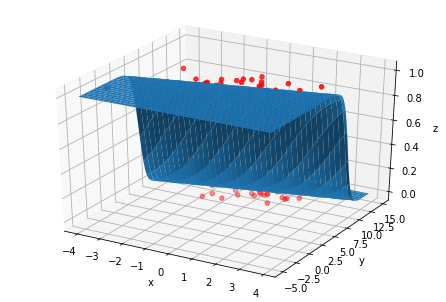

In [117]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X,Y,Z, c='r')
ax.plot_surface(X1,Y1,Z1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.show()